# Pandas time series

In [4]:
import pandas as pd
import numpy as np

In [9]:
d = pd.to_datetime('2020-02-01-13:33:12')
d

Timestamp('2020-02-01 13:33:12')

In [12]:
dstmp = pd.Timestamp('2020-02-01-13:34:55')
dstmp

Timestamp('2020-02-01 13:34:55')

In [14]:
dates = pd.to_datetime([
    '2020-01-01-10:32:12',
    'Feb-1-2020-12:03:41',
    '2020-Mar-19-14:27:28',
    '23-April-2020-16:37:12'
])
dates

DatetimeIndex(['2020-01-01 10:32:12', '2020-02-01 12:03:41',
               '2020-03-19 14:27:28', '2020-04-23 16:37:12'],
              dtype='datetime64[ns]', freq=None)

In [21]:
# date range
dr = pd.date_range(start='2020-01-01',end='2020-01-30')
dr

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30'],
              dtype='datetime64[ns]', freq='D')

In [22]:
pd.date_range('2020-01-01', periods= 7, freq='3D') # skips every 3 days

DatetimeIndex(['2020-01-01', '2020-01-04', '2020-01-07', '2020-01-10',
               '2020-01-13', '2020-01-16', '2020-01-19'],
              dtype='datetime64[ns]', freq='3D')

In [23]:
# years
pd.period_range('2020', periods=20, freq='Y')

PeriodIndex(['2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027',
             '2028', '2029', '2030', '2031', '2032', '2033', '2034', '2035',
             '2036', '2037', '2038', '2039'],
            dtype='period[A-DEC]', freq='A-DEC')

## **Shifting** Time Series data
- shift: shifts the data
- tshift: shifts the time index

In [5]:
dates_ = pd.date_range('2020-01-01', periods=30)

values = np.random.random(30)

df = pd.DataFrame({'Values':values}, index=dates_)
df.head()

,Values
2020-01-01,0.210784
2020-01-02,0.880499
2020-01-03,0.287978
2020-01-04,0.960023
2020-01-05,0.096282


## Plot the Time Series data

In [6]:
import matplotlib.pyplot as plt

<AxesSubplot:>

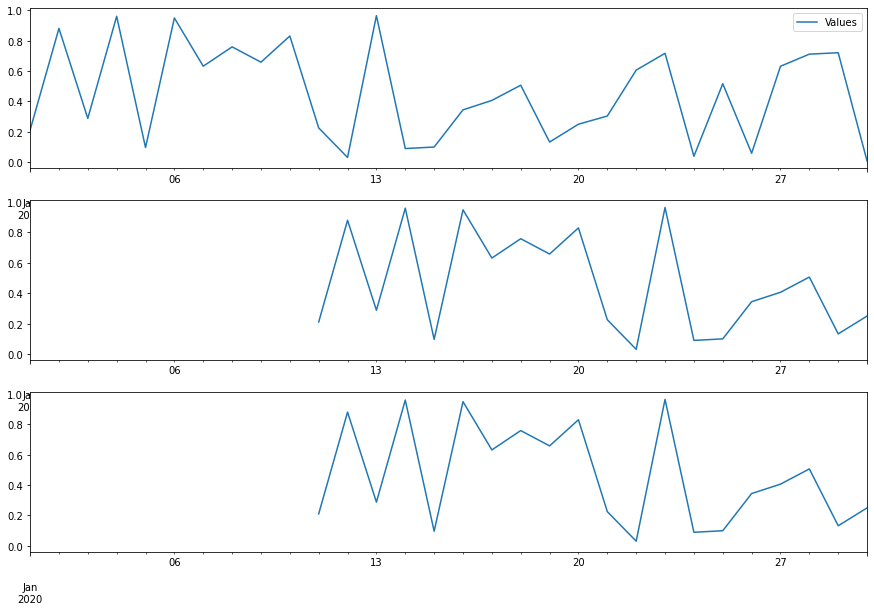

In [7]:
fig, axs= plt.subplots(nrows=3, figsize=(15,10), sharey= True)

df.plot(ax=axs[0], legend=True)
df.shift(10).plot(ax=axs[1], legend=None)
df.shift(10).plot(ax=axs[2], legend=None)

### Resampling
- **asfreq** returns the value at the end of the specified interval
- **resample** creates groups (or bins) of specified internal and lets you do aggregations on groups

In [38]:
dates_ = pd.date_range('2020-01-01', periods=365) # get a whole year
values = np.random.random(365) # 365 days

df2 = pd.DataFrame({'Values':values}, index=dates_)

# asfreq
df2.asfreq('M')[:5] # show first 5 months

,Values
2020-01-31,0.624475
2020-02-29,0.497493
2020-03-31,0.475288
2020-04-30,0.687661
2020-05-31,0.933319


In [39]:
df2.iloc[30]

Values    0.624475
Name: 2020-01-31 00:00:00, dtype: float64

**resample(‘M’)**


creates bins of months but we need to apply an aggregate function to get values. Let’s calculate the average monthly values. We can also confirm the result by comparing the average value of January:

In [41]:
df2.resample('M').mean()[:5]  # avg of first 5 values

,Values
2020-01-31,0.491904
2020-02-29,0.516421
2020-03-31,0.450612
2020-04-30,0.547473
2020-05-31,0.558174


In [42]:
df2[:31].mean()

Values    0.491904
dtype: float64

### Rolling


Rolling is a very useful operation for time series data. 
Rolling means creating a rolling window with a specified size and perform calculations on the data in this window which, of course, rolls through the data. The figure below explains the concept of rolling.


It is worth noting that the calculation starts when the whole window is in the data. In other words, if the size of the window is three, the first aggregation is done at the third row. Let’s apply rolling with size 3 to the DataFrame we created:

In [43]:
df2.head()

,Values
2020-01-01,0.068391
2020-01-02,0.950124
2020-01-03,0.029529
2020-01-04,0.029526
2020-01-05,0.382001


In [45]:
df2['Values'].rolling(3).mean()[:10] 

2020-01-01         NaN
2020-01-02         NaN
2020-01-03    0.349348
2020-01-04    0.336393
2020-01-05    0.147019
2020-01-06    0.448468
2020-01-07    0.555192
2020-01-08    0.491424
2020-01-09    0.257092
2020-01-10    0.210078
Freq: D, Name: Values, dtype: float64

### common patterns observed in a time series are:
- Trend: An overall upward or downward direction.
- Seasonality: Patterns that repeat observed or predictable intervals.
- White noise: Time series does not always follow a pattern or include seasonality. Some processes produce just random data. This kind of time series is called white noise.


- Note: The patterns are not always smooth and usually include some kind of noise. Furthermore, a time series may include a combination of different patterns.

In [54]:
def plot_time_series(time, values, label):
    plt.style.use('dark_background')

    plt.figure(figsize=(10,6))
    plt.plot(time, values)
    plt.xlabel("Time", fontsize=20)
    plt.ylabel("Value", fontsize=20)
    plt.title(label, fontsize=20)
    plt.grid(True)

## Trend in Time Series

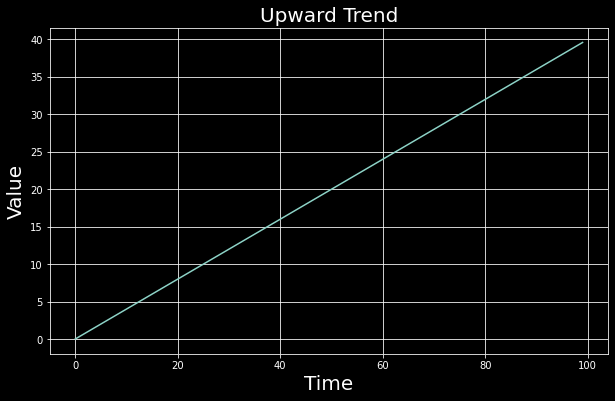

In [55]:
time = np.arange(100)
values = time*0.4
plot_time_series(time, values, "Upward Trend")

## **Seasonality** in Time Series

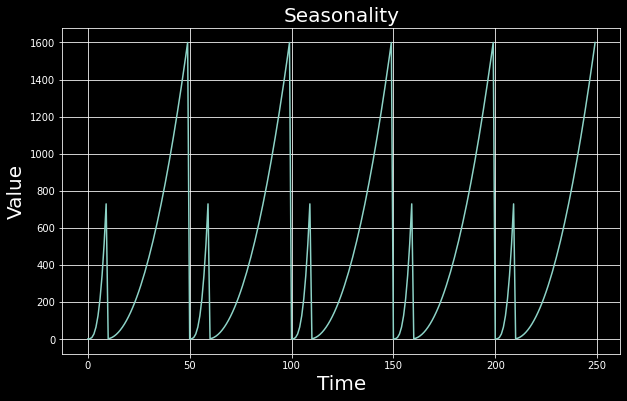

In [56]:
# Just a random pattern
time = np.arange(50)
values = np.where(time < 10, time**3, (time-9)**2)
# Repeat the pattern 5 times
seasonal = []
for i in range(5):
    for j in range(50):
        seasonal.append(values[j])
# Plot
time_seasonal = np.arange(250)
plot_time_series(time_seasonal, seasonal, label="Seasonality")

## *Noise* in data
- We can create the random noise using np.random.randn function. Then add that noise to the original seasonal series:

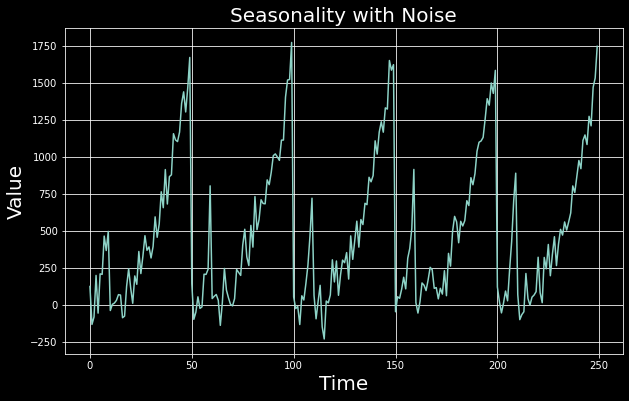

In [57]:
noise = np.random.randn(250)*100
seasonal += noise
time_seasonal = np.arange(250)
plot_time_series(time_seasonal, seasonal, label="Seasonality with Noise")

## Multiple Patterns
- following time series contain both an upward trend and seasonality. Ofcourse, there is also some noise.

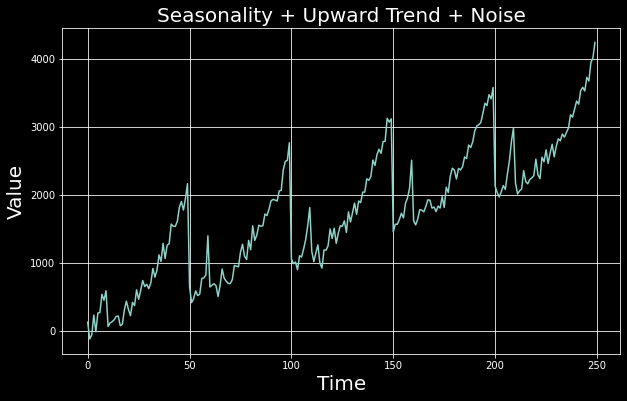

In [58]:
seasonal_upward = seasonal + np.arange(250)*10
time_seasonal = np.arange(250)
plot_time_series(time_seasonal, seasonal_upward, label="Seasonality + Upward Trend + Noise")

## White *Noise* 
- Some processes just produce random data that does not follow any pattern. 
- This kind of time series is known as white noise which is very hard to analyze and predict. Let’s create an example of white noise:

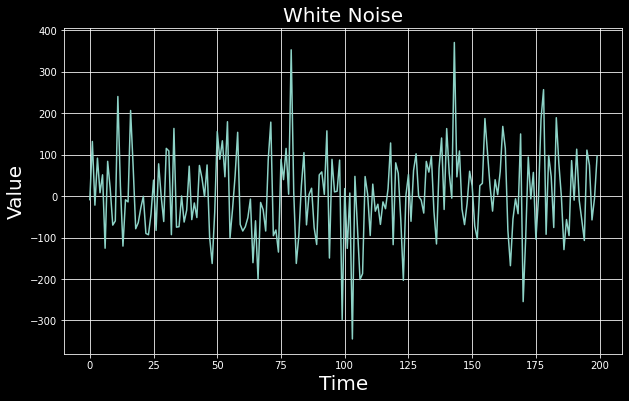

In [59]:
time = np.arange(200)
values = np.random.randn(200)*100
plot_time_series(time, values, label="White Noise")

## **Non-stationary** Time Series
- life is full of surprises so we may encounter some events that break the pattern and creates non-stationary time series. 
- For example, coronavirus is such a big event that messed up many patterns and businesses are required to update their time series analysis. 

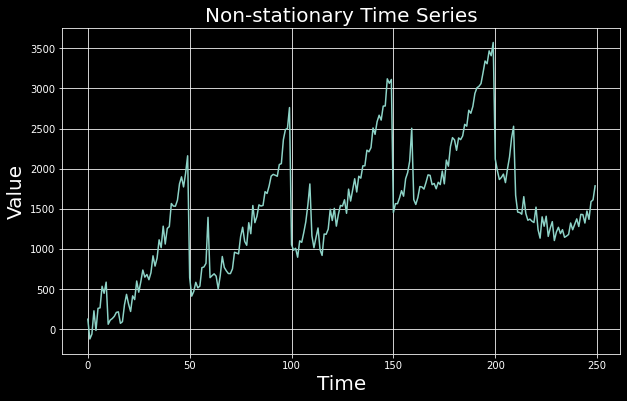

In [60]:
big_event = np.zeros(250)
big_event[-50:] = np.arange(50)*-50
non_stationary = seasonal_upward + big_event
time_seasonal = np.arange(250)
plot_time_series(time_seasonal, non_stationary, label="Non-stationary Time Series")